<b>This guide will cover some more advanced functions you can use with your scatterplot. The example code used here comes from the Planet9 Plotting Demo.</b>

<b>Note: except for the last cell, all code cells are prefaced with if False: so that they don't execute. The reason we don't want them to execute is because of how jupyter works with certain calls and certain snippets will break as a result.</b>

<h2>Imports</h2>

As always, you will need to start with imports.

In [1]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    from matplotlib import *

<h2>Magic Functions</h2>

Now, we will enable the inline backend using a magic function. We want to enable the inline backend so that we may set matplotlib's output formats and quality.

In [2]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    %matplotlib inline
    from IPython.display import set_matplotlib_formats
    set_matplotlib_formats('png', 'pdf',quality=100)

In [3]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    #more imports
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import cm
    import matplotlib.colors as colors

<h2>Data</h2>

To build our data for this scatterplot, we are going to use the np.genfromtxt function to build arrays we need for our data set from a collection of data put in a .txt file. We need to define the path to this text file. Full np.genfromtxt documentation may be found <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html">here.</a> There are too many parameters to detail here fully, but here is some information on a few:
<ul>
    <li><b>fname</b> - the path to the file in question.</li>
    <li><b>dtype</b> - the data type of the array outputted by the function. Defaults to something determined by the contents of each column in the resultant array.</li>
    <li><b>delimiter</b> - string used to separate values. By default, consecutive whitespace is the delimiter.
</ul>

In [4]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    samples_filename = '/Users/John McGowan/jupyter notebook files/Planet9_plotting_demo_samples.txt'
    eccentricity, S_metric, A_metric = np.genfromtxt(samples_filename, skip_header = 1).T

#np.genfromtxt generates an array based off the data inside the given text file. The scientists who created this program set up
#their data in such a way that when fed into the genfromtxt function this way and then transposed (the .T transposes the array)
#it would be an array of length 3 (3 rows) such that the first row is the eccentricity row, the second the S_metric row,
#and the third the A_metric row.

<h2>Figure and Axes</h2>

We're going to create a figure here. Figures are essentially the window that our graph goes into. If we want, we may create multiple figures and put different graphs into each, and even choose the size of the figure (full documentation <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure">here</a>) You can create one using:

plt.figure(num=figureNumber, figsize=(x,y), dpi=int, facecolor=bgColor, edgecolor=borderColor)

<ul>
    <li><b>num</b> - the number of the figure you are creating. If not given, a new figure will be made and the figure number is increased by one.</li>
    <li><b>figsize</b> - tuple of integers that gives the size of the figure in inches.</li>
    <li><b>dpi</b> - the resolution of the figure.</li>
    <li><b>facecolor</b> -  the background color.</li>
    <li><b>edgecolor</b> -  the color of the borders.</li>
</ul>

Additionally, by calling figure, we don't need to use plt.show() to display the image as the figure window will show up by itself.

We're also going to create a subplot on the figure. The reason the subplot is called ax (as in axes) is because axes are very similar to subplots. When creating it, you must give it an y x and z (in that order!). Whatever it is given for its y x and z determines the ratio of the figure it takes up. For example, while 111 would take up the entire figure, 211 would give a plot that is the length of the x axis with a height of half the y axis while 221 would give a plot with a length of half the x axis with a height of half the y axis. You may also choose to delimit the cooridnates with commas. Full documentation can be found <a href="https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot">here.</a>

In [5]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    fig = plt.figure(figsize = (10,7))
    ax = fig.add_subplot(111,label="Guide")

In [6]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    #some calculations to get the numbers how we want them for graphing the data we need
    max_value = np.max(A_metric)
    min_value = np.min(A_metric)
    ptp = max_value - min_value
    size_array = -30/ptp*(A_metric - min_value) + 32

<h2>Scatterplot</h2>

The scatter function itself was detailed in the basic guide. It's being used here to plot the S_metric data vs the eccentricity data where each dot has a size mandated by size_array, color mandated by A_metric, and an alpha of 0.3. While the full documentation can be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter">here,</a> the other parameters do the following:
<ul>
    <li><b>vmin/vmax</b> - they are used to normalize luminance data.</li>
    <li><b>rasterized</b> - to rasterize is to convert an image that is stored as an outline into pixels that can be displayed or printed. What this ends up meaning is that for graphs that have a lot of points that overlap each other and also have some transparancy, rasterizing the plot makes the graph look less muddled and blurry.
</ul>

rasterized is an example of a kwarg (that is, key word argument), which is a secondary set of arguments that are shared by a particular group of functions.

In [7]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    plt.scatter(S_metric, eccentricity, s = size_array,
               alpha = 0.3, c = A_metric, edgecolor = None, vmin = -1, vmax = 0,
               rasterized = True)

<h2>Colorbar and MathText</h2>

The colorbar serves as a sort of legend to the coloring of the points on the scatterplot and shows a color scale with relavent data labels. You need a mappable to use a colorbar, and a mappable can be something like an axes or an imshow image. You either need to have a mappable initialized for the colorbar to default to or you need to pass it a mappable for it to be placed on. While it has some other arguments it can be passed (which can be found <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colorbar">here,</a> in the documentation, it more importantly has properties that are used to set most of its attributes. Please note that colorbar has a base class called ColorbarBase (documentation <a href="https://matplotlib.org/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase">here</a>) that gives extra properties to colorbar. Some of these properties are:
<ul>
    <li><b>cbar.ax</b> - the axes that the colorbar is drawn on</li>
    <li><b>cbar.set_alpha(number)</b> - sets the alpha of the colorbar</li>
    <li><b>cbar.draw_all()</b> - calculates any free parameters based on the colormap and the norm and does all the drawing.</li>
</ul>

Note that properties seen below such as cbar.ax.tick_params are parameters that belong to the axes. Also note that certain attributes, such as the ticks of the colorbar, are set to something reasonable based off the data by default.

In the next snippet of code, we also see the replacement techniques detailed in the basic guide to create symbols. However, some more advanced replacement techniques are used here. The text that is being replaced is encased by r'$ ... $' . Some of these replacements are:
<ul>
    <li><b>"\symbol"</b> will produce the corresponding symbol.</li>
    <li><b>"word_i"</b> will produce "word" with "i" subscripted.</li>
    <li><b>"word^i"</b> will produce "word" with "i" superscripted.</li>
    <li><b>"\frac{num1}{num2}"</b> will produce a fraction with num1 as the numerator and num2 as the denominator.</li>
    <li><b>"\left ... \right"</b> will encompass the insides entirely with parentheses.</li>
    <li><b>"\sqrt[num]{var}"</b> creates a root with var inside the root and num as the power of the root.</li>
</ul>

Full documentation may be found <a href="https://matplotlib.org/users/mathtext.html">here.</a>

In [8]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    cbar = plt.colorbar()
    cbar.ax.set_ylabel(r'$\left<{A_\omega(t)}\right>$', fontsize = 22)
    cbar.ax.tick_params(labelsize=17)
    cbar.set_alpha(0.7)
    cbar.draw_all()

<h2>Ticks, Plotting, Labeling, etc.</h2>

Since the ticks of the axes are Python objects, we can iterate over them to change their individual properties (in this case, their fontsize) instead of using the plt.x(y)ticks function. If we wanted to, we could set individual ticks to have different properties from the rest. Full documentation on the ticks class can be found <a href="https://matplotlib.org/api/axis_api.html#tick-objects">here.</a> Then, just as explained in the basic guide, we set the x and y limits.

In [9]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)   
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
    plt.xlim((1, 6.8))
    plt.ylim((0.1,0.9))

As explained in the basic guide, the plot command plots either a point or a series of connected points from the given coordinates. In this case, we're plotting two points and connecting them: (x, 0.1) and (x, 0.9). 'k--' refers to the style of the line: certain letters may be placed at the beginning of the style parameter to indicate the color and the rest of the string refers to the style itself. In this case, k-- refers to a black dashed line. So this section of the code is basically drawing a straight, black, dashed line at whatever x is set to, in this case 6.517036. (You may find the full plot command documentation <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">here.</a>)

In [10]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    x = 6.517036   # Clustering threshold 
    plt.plot([x,x],[0.1, 0.9], 'k--', linewidth = 2)

Labeling the x and y axis.

In [11]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    plt.xlabel(r'$\left<{S_\omega(t)}\right>$', fontsize = 22)
    plt.ylabel(r'$e_{P9}$', fontsize = 22)

<h2>Saving your image</h2>

Tight layout automatically changes parameters of the subplot to fit it into the figure area. (Documentation <a href="https://matplotlib.org/users/tight_layout_guide.html">here.</a>)

Savefig saves the current figure to the specified path with a depth per inch of the assigned value. (Documentation <a href="https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig">here.</a>

In [12]:
if False:#we don't want this code to execute as it will cause problems due to how jupyter is set up
    plt.tight_layout()
    plt.savefig('/Users/John McGowan/jupyter notebook files/eccentricity_scatter_plot.pdf', dpi = 100)

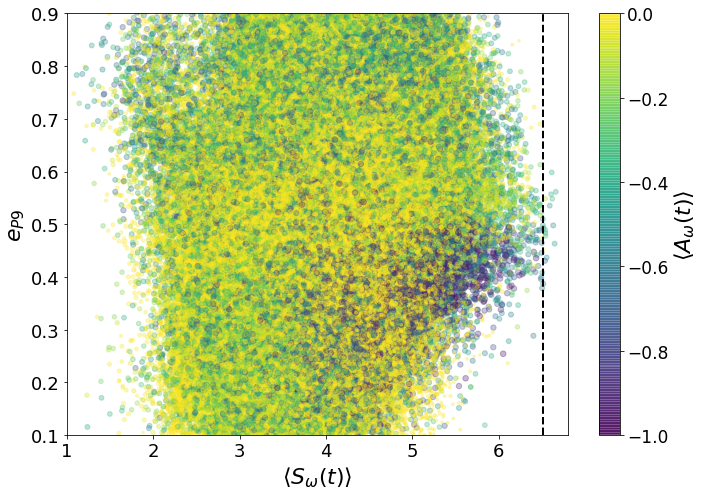

In [13]:
from matplotlib import *
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf',quality=100)
#more imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
samples_filename = '/Users/John McGowan/jupyter notebook files/Planet9_plotting_demo_samples.txt'
eccentricity, S_metric, A_metric = np.genfromtxt(samples_filename, skip_header = 1).T

#np.genfromtxt generates an array based off the data inside the given text file. The scientists who created this program set up
#their data in such a way that when fed into the genfromtxt function this way and then transposed (the .T transposes the array)
#it would be an array of length 3 (3 rows) such that the first row is the eccentricity row, the second the S_metric row,
#and the third the A_metric row.

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111,label="Guide")
#some calculations to get the numbers how we want them for graphing the data we need
max_value = np.max(A_metric)
min_value = np.min(A_metric)
ptp = max_value - min_value
size_array = -30/ptp*(A_metric - min_value) + 32
plt.scatter(S_metric, eccentricity, s = size_array, \
            alpha = 0.3, c = A_metric, edgecolor = None, vmin = -1, vmax = 0,\
           rasterized = True)
cbar = plt.colorbar()
cbar.ax.set_ylabel(r'$\left<{A_\omega(t)}\right>$', fontsize = 22)
cbar.ax.tick_params(labelsize=17)
cbar.set_alpha(0.7)
cbar.draw_all()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
plt.xlim((1, 6.8))
plt.ylim((0.1,0.9))
x = 6.517036   # Clustering threshold 
plt.plot([x,x],[0.1, 0.9], 'k--', linewidth = 2)
plt.xlabel(r'$\left<{S_\omega(t)}\right>$', fontsize = 22)
plt.ylabel(r'$e_{P9}$', fontsize = 22)
plt.tight_layout()
#plt.savefig('/Users/John McGowan/jupyter notebook files/eccentricity_scatter_plot.pdf', dpi = 100)